#Introduction#

This report is prepared by Damilola Eyitayo as a solution to the Insight Pre-Session Data Exercise. The data exercise entails analysis of a dataset on users of an e-commerce website. The goal is to draw insights from the data to help increase conversion rate i.e probability of a user making a purchase. The variables in the dataset include: country location of the e-commerce website user, age of the user, binary variable indicating whether the user is a returning or new user, marketing source by which the user got to the e-commerce website, total pages on the e-commerce website visited by the user and lastly, the binary response variable indicating whether the user made a purchase or not.



#Analysis & Results#

In [1]:
# Importing libraries for data exploration and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset into Jupyter notebook
Conversion_df = pd.read_csv('conversion_data.csv')

In [3]:
# Checking to see what the dataframe looks like
Conversion_df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
# Checking to see the size of the dataframe and the data types of each variable
Conversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
# Checking for columns with missing values
cols_with_missing = [col for col in Conversion_df.columns
                     if Conversion_df[col].isnull().any()]
cols_with_missing

[]

*Now that we can confirm that there are no missing values and variables are of the appropriate data type, we can go ahead and make some plots.*

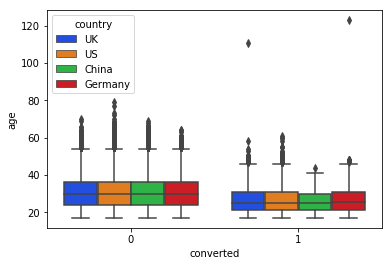

In [112]:
# First, we plot the response variable- converted and age, grouped by country

sns.boxplot(x="converted", y="age", hue="country",
            data=Conversion_df, palette="bright")

*It appears those who made purchases are younger than those who did not for the session being examined. And this appears to hold true across the four countries in the data set. This assumption is based on the obvious lower median age for users who made purchases. So we might assume there is an age demographic component to the probability of a user of the e-commerce website making a purchase.*

In [14]:
# We might examine the data more closely by extracting summary statistics 
# for the age variable as follows:
Conversion_df.groupby('converted')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
converted,,,,,,,,
0,306000.0,30.703961,8.275779,17.0,24.0,30.0,36.0,79.0
1,10200.0,26.546765,7.051849,17.0,21.0,25.0,31.0,123.0


*Our summary statistics seem to validate the assumption that younger users are more likely to make a purchase, in other words
to be converted.*

*Another variable that might influence conversion rate is the marketing channel source or how the user got to the e-commerce website.*

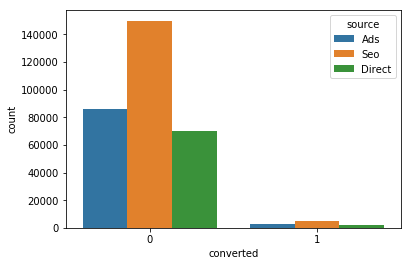

In [17]:
# We can explore this possibility by making a grouped barplot of the 
# converted variable as follows:
sns.countplot(x='converted', hue='source', data=Conversion_df)

*The plot indicate that most users whether or not they made a purchase got to the e-commerce website based off from search results.*

In [18]:
# We can explore this graph more closely by obtaining counts for 
# the response variable grouped by marketing channel source

df1 = Conversion_df.groupby('source')['converted'].count()
df1

source
Ads        88740
Direct     72420
Seo       155040
Name: converted, dtype: int64

In [19]:
# Creating a dataframe with data for purchases only
Converted_purchases = Conversion_df[Conversion_df['converted'] == 1]
Converted_purchases.head()

,country,age,new_user,source,total_pages_visited,converted
54,US,25,1,Direct,18,1
72,US,33,0,Seo,15,1
87,US,18,0,Direct,19,1
130,US,17,0,Ads,19,1
182,US,19,0,Ads,9,1


In [20]:
# Now we can obtain counts for conversions grouped by marketing channel source 
# as follows:
df2 = Converted_purchases.groupby('source')['converted'].count()
df2

source
Ads       3060
Direct    2040
Seo       5100
Name: converted, dtype: int64

In [111]:
# Creating a new dataframe summarizing the response variable grouped by 
# marketing channel source
df3 = pd.concat([df1, df2], axis=1, ignore_index=True)
df3

,0,1
source,,
Ads,88740,3060
Direct,72420,2040
Seo,155040,5100


In [22]:
# Renaming columns appropriately

df3.rename(columns = {0:'Total', 1:'Purchase_counts'}, inplace = True)
df3

,Total,Purchase_counts
source,,
Ads,88740,3060
Direct,72420,2040
Seo,155040,5100


In [23]:
# We can also compute conversion rate (in percent) per marketing channel source 
df3['Conversion rate'] = (df3['Purchase_counts']/df3['Total'])*100
df3

,Total,Purchase_counts,Conversion rate
source,,,
Ads,88740,3060,3.448276
Direct,72420,2040,2.816901
Seo,155040,5100,3.289474


*This simple data exploration indicate that advertisements seem to foster a higher conversion rate.*

*Lastly, we might want to explore the contrast in conversion rate between new and returning users.*

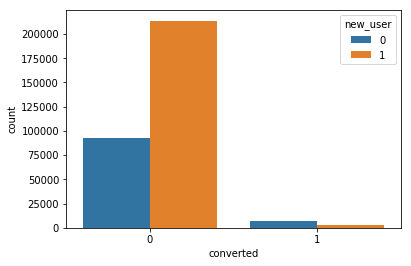

In [26]:
# we can visualize this with a grouped barplot as follows:
sns.countplot(x='converted', hue='new_user', data=Conversion_df)

*The plot above indicate that returning users are more likely to make purchases than new users of the e-commerce website.*

In [27]:
# We might also want to look at the conversion rate per 'new user' classification

# First, we create a new dataframe for counts of conversions by new_user category

df4 = Conversion_df.groupby('new_user')['converted'].count()

# Then we create another dataframe for new_user category by actual purchases

df5 = Converted_purchases.groupby('new_user')['converted'].count()

# We can then concatenate both dataframes as follows:
df6 = pd.concat([df4, df5], axis=1, ignore_index=True)


# We can rename columns as follows:
df6.rename(columns = {0:'Total', 1:'Purchase_counts'}, inplace = True)

# And compute conversion rate (in percent) per new_user category 
df6['Conversion rate'] = (df6['Purchase_counts']/df6['Total'])*100
df6


,Total,Purchase_counts,Conversion rate
new_user,,,
0,99456,7161,7.200169
1,216744,3039,1.402115


*Now we can confirm returning users are more likely to make purchases, with a conversion rate five times (7.2%/1.4%) that of new users.*

In [29]:
# Moving on from data exploration to modelling

# While the goal is to create a model to predict conversion rate, 
# one can go about this by rather creating a model to predict 
# the probability of a user of the e-commerce website making a purchase

# As we have a binary response variable 'converted', a logistic regression 
# is considered ideal for modelling the relationship between the probability
# of a user making a purchase and the remaining variables 
# in the data set as predictors

# This approach to the problem is appropriate because increasing the probability 
# of users making a purchase is directly related to the conversion rate (CR). 
# Recall: CR = number of conversions/total number of visitors to the 
# e-commerce website.



In [30]:
# Now back to the original dataset
Conversion_df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [31]:
# Looking at our dataset, we have two categorical variables- (country and source) 
# that need to be coded as dummy variables.

# We can do that by creating new columns for the variables as follows:

Country = pd.get_dummies(Conversion_df['country'],drop_first=True)
Source = pd.get_dummies(Conversion_df['source'],drop_first=True)

In [34]:
# We are dropping the first columns from the output to prevent 
# multicollinearity problems, since values from the the other columns 
# are perfect predictors of the dropped column value, respectively.

In [36]:
# Now we can add the new colums to our dataset and drop their parent columns 
# from the dataset

Conversion_df2 = pd.concat([Conversion_df,Country,Source],axis=1)
Conversion_df2.drop(['country', 'source'], axis=1, inplace=True)
Conversion_df2.head()

,age,new_user,total_pages_visited,converted,Germany,UK,US,Direct,Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [37]:
# Now our dataset is ready to used to create a model for predicting probability
# of conversion using machinne learning approaches

In [38]:
# We begin by building a logistic regression model

# Importing library for splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split

In [114]:
# Now we split the dataset with 80% for training the model and 
# the remainder for model validation
X = Conversion_df2.drop('converted', axis=1)
y = Conversion_df2['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
                                    

In [115]:
# Finally we train the model and use it to make predictions based off 
# the testing dataset.

# Importing library for building a logistic regression model

from sklearn.linear_model import LogisticRegression

# Creating an instance of a logistic regression model called logregress_model
logregress_model = LogisticRegression()

# Fitting the training dataset to the instance
logregress_model.fit(X_train,y_train)


C:\Users\eyita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
# Now to making predictions
log_predictions = logregress_model.predict(X_test)

In [92]:
# We can then compare our model predictions with actual y values using a 
# classification report

from sklearn.metrics import classification_report

print(classification_report(y_test,log_predictions))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61223
           1       0.85      0.71      0.77      2017

    accuracy                           0.99     63240
   macro avg       0.92      0.85      0.88     63240
weighted avg       0.99      0.99      0.99     63240



*Our model seem to be doing fine in predicting the chances of a user making a purchase based off the explanatory variables As we are most interested in the ability to predict the probability of a user making a purchase, **Precision** is our most valued metric from the classification report. Here, we have 85% correctness in predicting the probability of a user making a purchase. This can be considered OK given the size of the dataset and the fact that we are dealing with only a handful of predictor variables. Other variables that might be considered to improve model precision include: income levels of users, and their spending habits or/and disposable income.*

In [94]:
# we can also examine predicted y-values as follows:
# First, we make a dataframe showing predictor variables, the observed y-values 
# and predicted y-values

df7 = pd.DataFrame(y_test)
df7['preds'] = log_predictions
df8 = pd.merge(X_test,df8,how = 'left',left_index = True, right_index = True)
df8.head()

,age,new_user,total_pages_visited,Germany,UK,US,Direct,Seo,converted,preds
309020,22,1,5,0,0,1,0,0,0,0
216907,21,0,3,0,0,1,0,1,0,0
291760,22,0,11,0,0,1,1,0,1,0
29866,29,1,7,0,0,0,0,0,0,0
236314,33,1,4,0,1,0,0,0,0,0


In [103]:
# Now we can do some summary statistics on the predicted y-values

In [101]:
# We can examine the age demographics of users predicted to make purchases
df8.groupby('preds')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
preds,,,,,,,,
0,61574.0,30.669650,8.248613,17.0,24.0,30.0,36.0,79.0
1,1666.0,26.342137,6.666351,17.0,21.0,25.0,30.0,53.0


*The logistic regression model suggests the average age of users making a purchase is 26 yrs.*

In [102]:
# We can also examine the number of pages visited by users predicted to 
# make a purchase
df8.groupby('preds')['total_pages_visited'].describe()

,count,mean,std,min,25%,50%,75%,max
preds,,,,,,,,
0,61574.0,4.568552,2.793530,1.0,2.0,4.0,6.0,17.0
1,1666.0,16.068427,2.957375,11.0,14.0,16.0,18.0,28.0


*The logistic regression model also indicate that users predicted to make a purchase visit on average 16 pages, which is more than three times the average number of pages on the e-commerce website visited by those predicted not to make a purchase.*

In [104]:
# we can also examine the proportion of new to returning users for those 
# predicted to make purchases by the logistic regression model.

# Creating a new dataframe for only predicted purchases

df9 = df8[df8['preds'] == 1]
df10 = df9.groupby('new_user')['preds'].count()
df10

new_user
0    1278
1     388
Name: preds, dtype: int64

*Finally, the logistic regression model suggests that returning users are three times (1278/388) more likely to make a purchase than new users.*

#Conclusions & Recommendations#

The main insights emanating from the data analysis are as follows:

1. Younger users with an average age of 26 years are more likely to make a purchase.

2. Most visitors to the e-commerce website got there by clicking on search results rather than directly or by clicking on an advertisement. This suggest that the e-commerce company has good visibility online. However, users who got to the website by clicking on an advertisement are slightly more likely to make a purchase.

3. Returning users are three to five times more likely to make purchases than new users.

4. Users who made purchases tend to browse more pages on the e-commerce website that those who did not.

Consequently, I would like to make the following recommendations for the product and marketing teams to improve conversion rate.

1. The marketing team should take care to ensure advertisements and marketing campaigns particularly target users in their twenties and thirties, as it appears the company's products are most appealing to this age demographic.

2. The product and marketing teams should invest more in advertisements, which tend to lead to a higher conversion rate.

3. The product team should strive to improve attractiveness of the e-commerce website's user interface, so as to encourage users to browse more pages on the website and thereby increase the chance of conversion. Such improvememnts to the user interface can be based off feedback from customers themselves or contracting an expert web designer to enhance the quality of the e-commerce website.

4. Finally, the company should leverage its existing customer base to boost sales, as they are more likely to make purchases than new users of the e-commerce website. This may take the form of extending credit to existing customers and acting on feedback to improve the overall customer experience. However, doing this would likely necessitate a more in-depth analysis of the company's customers.

